In [1]:
import pandas as pd
import numpy as np
data_train=pd.read_csv("D:/Datasets/Kaggle/Titanic/train.csv")
data_test=pd.read_csv("D:/Datasets/Kaggle/Titanic/test.csv")

In [2]:
pd.set_option("max_rows",None)
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_train.shape

(891, 12)

In [6]:
data_train = data_train.fillna(data_train['Age'].median())

In [7]:
data_train = data_train.drop('Cabin', axis=1)

In [8]:
data_train = data_train.dropna()

In [9]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

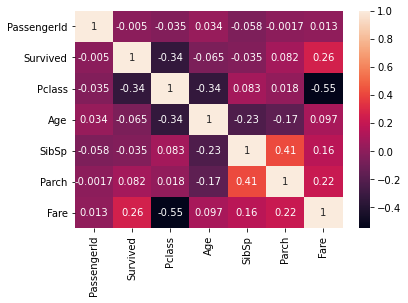

In [10]:
import seaborn as sns
corr=data_train.corr()
sns.heatmap(corr, annot=True)

In [11]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

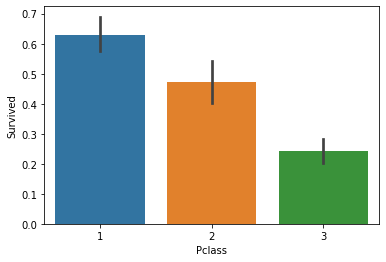

In [12]:
sns.barplot(data=data_train, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

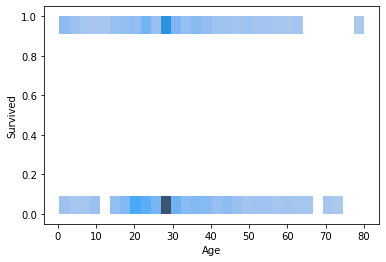

In [13]:
sns.histplot(data=data_train, x='Age', y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

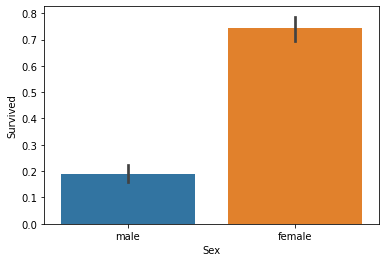

In [14]:
sns.barplot(data=data_train, x='Sex', y='Survived')

In [15]:
data_train['Embarked'].value_counts()

S       644
C       168
Q        77
28.0      2
Name: Embarked, dtype: int64

In [16]:
data_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [17]:
data_train=pd.get_dummies(data=data_train ,columns=['Sex'],drop_first=True)
data_train=pd.get_dummies(data=data_train ,columns=['Embarked'],drop_first=True)
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [18]:
y_train = data_train["Survived"]

In [19]:
features=["Age", "Fare", "Pclass", "SibSp", "Parch", "Sex_male", 'Embarked_Q', 'Embarked_S', "Fare"]
x_train = data_train[features]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
X_train, x_test, Y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [22]:
#estimators = [('DTC', DecisionTreeClassifier()), ('svc', SVC()), ('NB', GaussianNB()), ('RFC', RandomForestClassifier(n_estimators=10, random_state=42))]
estimators = [('DTC', DecisionTreeClassifier()), ('RFC', RandomForestClassifier(n_estimators=10, random_state=42))]
clf=StackingClassifier(estimators=estimators , final_estimator=SGDClassifier(loss="hinge", penalty="l2", max_iter=5))
clf1=SVC()
clf2=LogisticRegression()
clf3=GaussianNB()

In [23]:
clf.fit(X_train,Y_train)
clf1.fit(X_train,Y_train)
clf2.fit(X_train,Y_train)
clf3.fit(X_train,Y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [24]:
y_hat_test = clf.predict(x_test)
y_hat_test1 = clf1.predict(x_test)
y_hat_test2 = clf2.predict(x_test)
y_hat_test3 = clf3.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy of Stacking", accuracy_score(y_test, y_hat_test))
print("Accuracy of SVM", accuracy_score(y_test, y_hat_test1))
print("Accuracy of Logistic Regression", accuracy_score(y_test, y_hat_test2))
print("Accuracy of Naive", accuracy_score(y_test, y_hat_test3))

Accuracy of Stacking 0.5932203389830508
Accuracy of SVM 0.6610169491525424
Accuracy of Logistic Regression 0.8135593220338984
Accuracy of Naive 0.7898305084745763


In [26]:
data_test = data_test.fillna(data_test['Age'].median())

In [27]:
data_test = data_test.dropna()

In [28]:
data_test=pd.get_dummies(data=data_test ,columns=['Sex'],drop_first=True)
data_test=pd.get_dummies(data=data_test ,columns=['Embarked'],drop_first=True)

In [29]:
x_test = data_test[features]

In [30]:
prediction = clf2.predict(x_test)
output = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': prediction})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
